# Driver Drowsiness Detection using CNN

### Load & Install dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2 # for computer vision
import imghdr # for setting the right images
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

### Remove Unrelieble Images

In [2]:
# data directory
dir = '/content/drive/MyDrive/Drowsiness Detection Using CNN/Dataset'
# image exists
img_type = ['jpeg', 'jpg' , 'bmp', 'png']


In [3]:
for image_class in os.listdir(dir):
  for img in os.listdir(os.path.join(dir, image_class)):
    image_path = os.path.join(dir, image_class, img)
    try:
      imgs = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_type:
        print('image not exist in list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('issue with image {}'.format(image_path))
    

### Load DataSet

In [4]:
# API for descriptive and efficient input
data = tf.keras.utils.image_dataset_from_directory(dir)

Found 645 files belonging to 2 classes.


In [5]:
# Data iterator means go each element one by one
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()
batch

(array([[[[208.0332   , 222.0332   , 222.0332   ],
          [149.65234  , 163.42969  , 163.20703  ],
          [ 85.43359  ,  97.0625   ,  95.24805  ],
          ...,
          [204.33008  , 211.70117  , 217.88672  ],
          [206.       , 213.88867  , 217.22266  ],
          [206.       , 214.       , 217.       ]],
 
         [[209.8137   , 223.8137   , 223.8137   ],
          [152.8311   , 166.60844  , 166.38579  ],
          [ 85.30394  ,  96.932846 ,  95.11839  ],
          ...,
          [ 87.399    ,  93.09465  ,  98.81412  ],
          [ 88.11328  ,  94.34886  ,  97.61914  ],
          [ 88.11328  ,  94.396484 ,  97.396484 ]],
 
         [[214.37732  , 228.37732  , 228.37732  ],
          [160.27911  , 174.05646  , 173.8338   ],
          [ 88.82114  , 100.45004  ,  98.63559  ],
          ...,
          [ 13.431896 ,  19.236782 ,  25.182095 ],
          [ 12.6328125,  18.78125  ,  22.578125 ],
          [ 12.6328125,  18.78125  ,  22.355469 ]],
 
         ...,
 
         [[ 

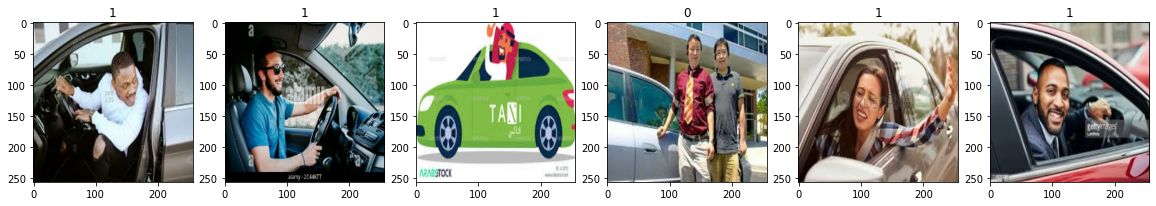

In [7]:
# show sample images
fig , ax = plt.subplots(ncols = 6 , figsize = (20,20))
for idx, img in enumerate(batch[0][:6]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

So Drowsy class refers to = 0
while nondrowsy class refers to = 1

### Scale The DataSet

In [8]:
data = data.map(lambda x,y: (x/255 , y))
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
data.as_numpy_iterator().next()
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Split dataset into train, validation and test data

In [10]:
len(data)

21

In [11]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size, val_size , test_size

(16, 4, 2)

In [13]:
# Reall split through skip and take method
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+ val_size).take(test_size)

In [14]:
len(train) , len(val) , len(test)

(16, 4, 1)

### Build CNN Deep Learning Model

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile('SGD' , loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'] )

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Train The Model

In [19]:
# logs to keep weights history
logdir = ('/content/drive/MyDrive/Drowsiness Detection Using CNN/logs')

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [22]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
16/16 [==============================] - 36s 2s/step - loss: 0.6907 - accuracy: 0.5664 - val_loss: 0.6849 - val_accuracy: 0.7109
Epoch 2/100
16/16 [==============================] - 36s 2s/step - loss: 0.6808 - accuracy: 0.5938 - val_loss: 0.6759 - val_accuracy: 0.5469
Epoch 3/100
16/16 [==============================] - 38s 2s/step - loss: 0.6795 - accuracy: 0.5684 - val_loss: 0.6756 - val_accuracy: 0.6016
Epoch 4/100
16/16 [==============================] - 36s 2s/step - loss: 0.6666 - accuracy: 0.6211 - val_loss: 0.6721 - val_accuracy: 0.7031
Epoch 5/100
16/16 [==============================] - 36s 2s/step - loss: 0.6739 - accuracy: 0.6172 - val_loss: 0.6585 - val_accuracy: 0.7344
Epoch 6/100
16/16 [==============================] - 36s 2s/step - loss: 0.6637 - accuracy: 0.6172 - val_loss: 0.6636 - val_accuracy: 0.7188
Epoch 7/100
16/16 [==============================] - 38s 2s/step - loss: 0.6636 - accuracy: 0.6133 - val_loss: 0.6336 - val_accuracy: 0.7031
Epoch 8/100
1

### Plot Performance

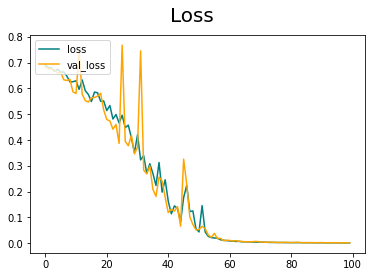

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

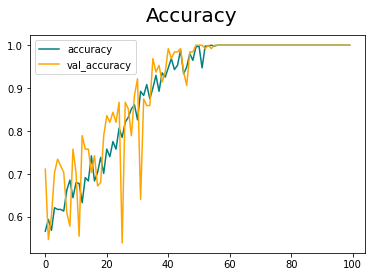

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate the model

In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 226ms/step


In [28]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


### Test result on unseen data

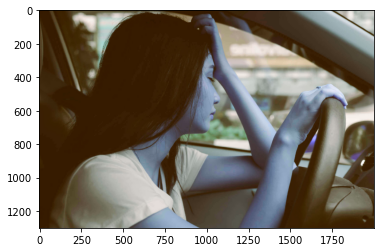

In [58]:
import cv2
import matplotlib.pyplot as plt

image= cv2.imread("/content/drive/MyDrive/Drowsiness Detection Using CNN/drowsy-driving-prevention-tips.jpeg")

plt.imshow(image)
plt.show()

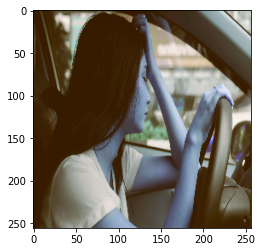

In [59]:
resize = tf.image.resize(image, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 50ms/step


array([[0.00411012]], dtype=float32)

In [61]:
if yhat > 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is Drowsy')

Predicted class is Drowsy


### Save the model for deployment

In [63]:
from tensorflow.keras.models import load_model

In [66]:
model.save(os.path.join('/content/drive/MyDrive/Drowsiness Detection Using CNN/Model','imageclassifier.h5'))


In [68]:
created_model = load_model('/content/drive/MyDrive/Drowsiness Detection Using CNN/Model/imageclassifier.h5')

In [72]:
created_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 185ms/step


array([[0.00411012]], dtype=float32)